In [1]:
%load_ext lab_black

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report

In [3]:
EPS = 10 ** -6

In [4]:
DATA_DIR = os.path.join("..", "data")
TRAIN_CSV_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_CSV_PATH = os.path.join(DATA_DIR, "test.csv")
CLASS_NAMES_PATH = os.path.join(DATA_DIR, "class_names.joblib")

In [5]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
X_train = train_df.drop("target", axis=1).values
y_train = train_df["target"].values

In [6]:
test_df = pd.read_csv(TEST_CSV_PATH)
X_test = test_df.drop("target", axis=1).values
y_test = test_df["target"].values

In [7]:
feature_names = test_df.drop("target", axis=1).columns

In [8]:
class_names = joblib.load(CLASS_NAMES_PATH)

### Full Tree

In [9]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

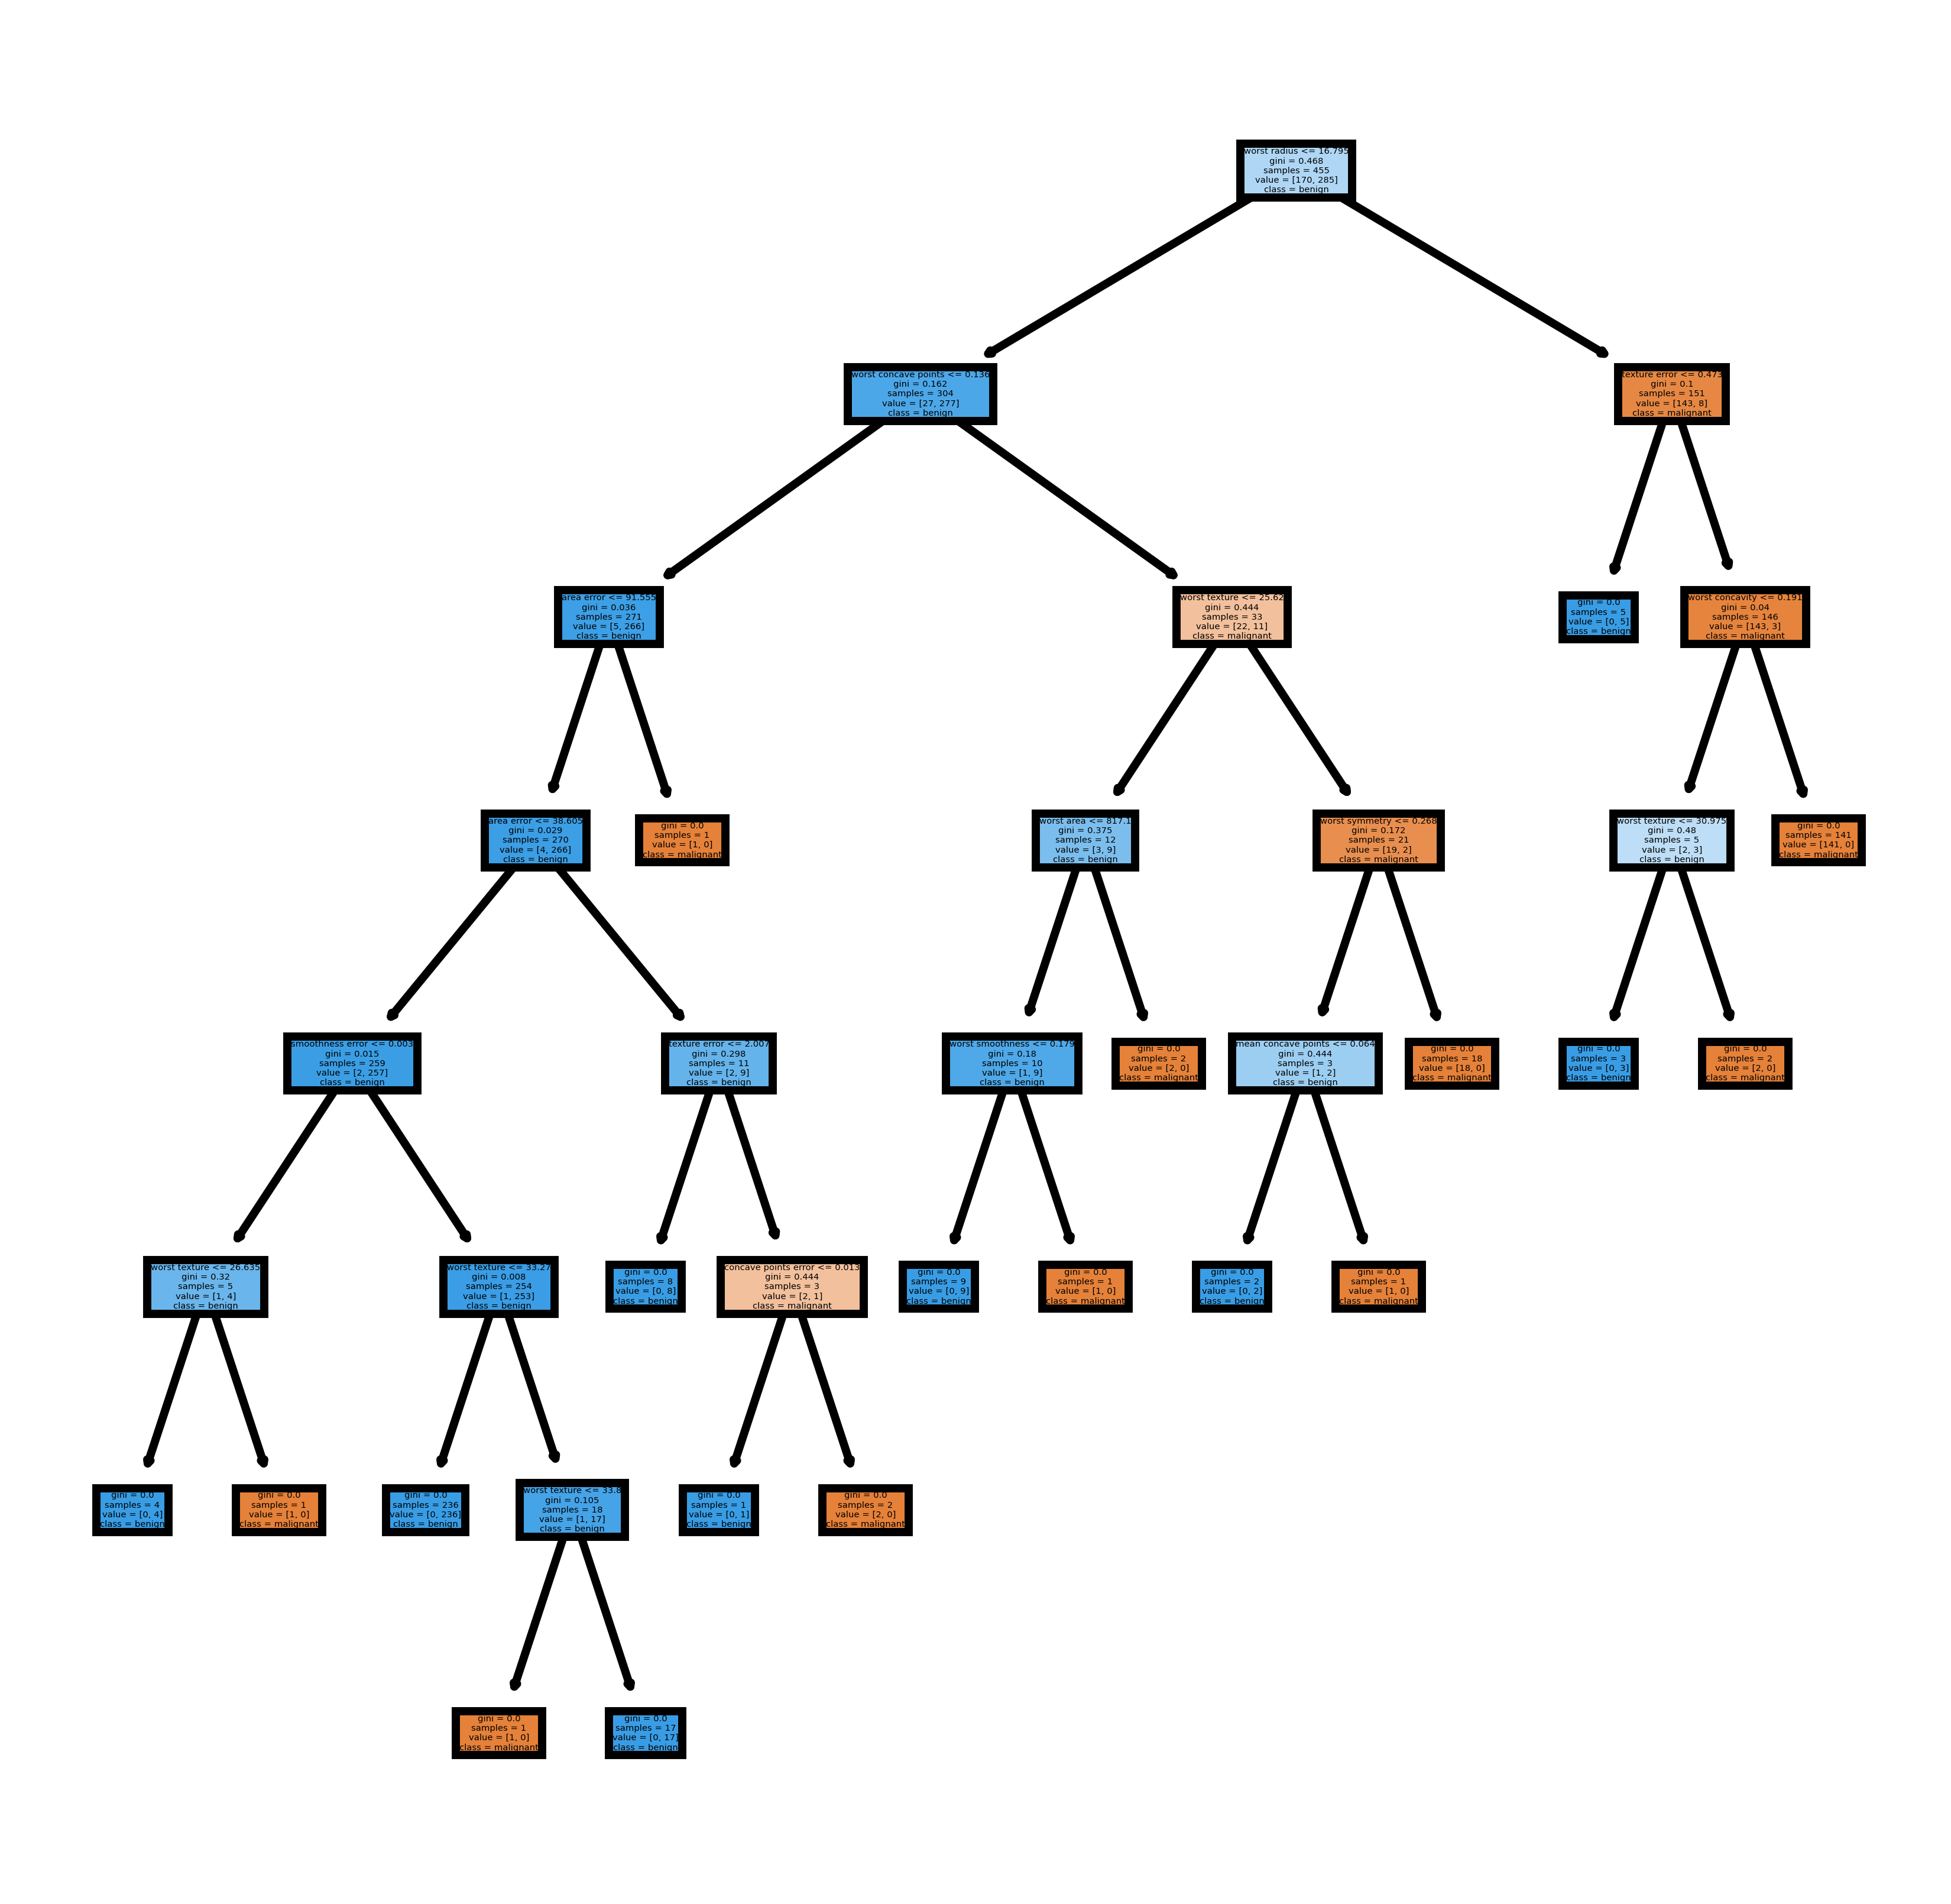

In [10]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(full_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [11]:
print(full_tree.get_depth())
print(full_tree.get_n_leaves())

7
19


In [12]:
print(classification_report(y_test, full_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



### Best Minimum Samples at Leaf Tree

In [13]:
min_samples_leaf_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid(
        {
            "min_samples_leaf": [
                [min_samples_leaf] for min_samples_leaf in np.arange(EPS, 0.5, 0.025)
            ]
        }
    ),
)

In [14]:
min_samples_leaf_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f090fe0f850>,
             scoring=make_scorer(accuracy_score))

In [15]:
min_samples_leaf_grid_search.best_params_

{'min_samples_leaf': 0.025001000000000002}

In [16]:
best_min_samples_leaf_tree = min_samples_leaf_grid_search.best_estimator_

In [17]:
print(best_min_samples_leaf_tree.get_depth())
print(best_min_samples_leaf_tree.get_n_leaves())

5
9


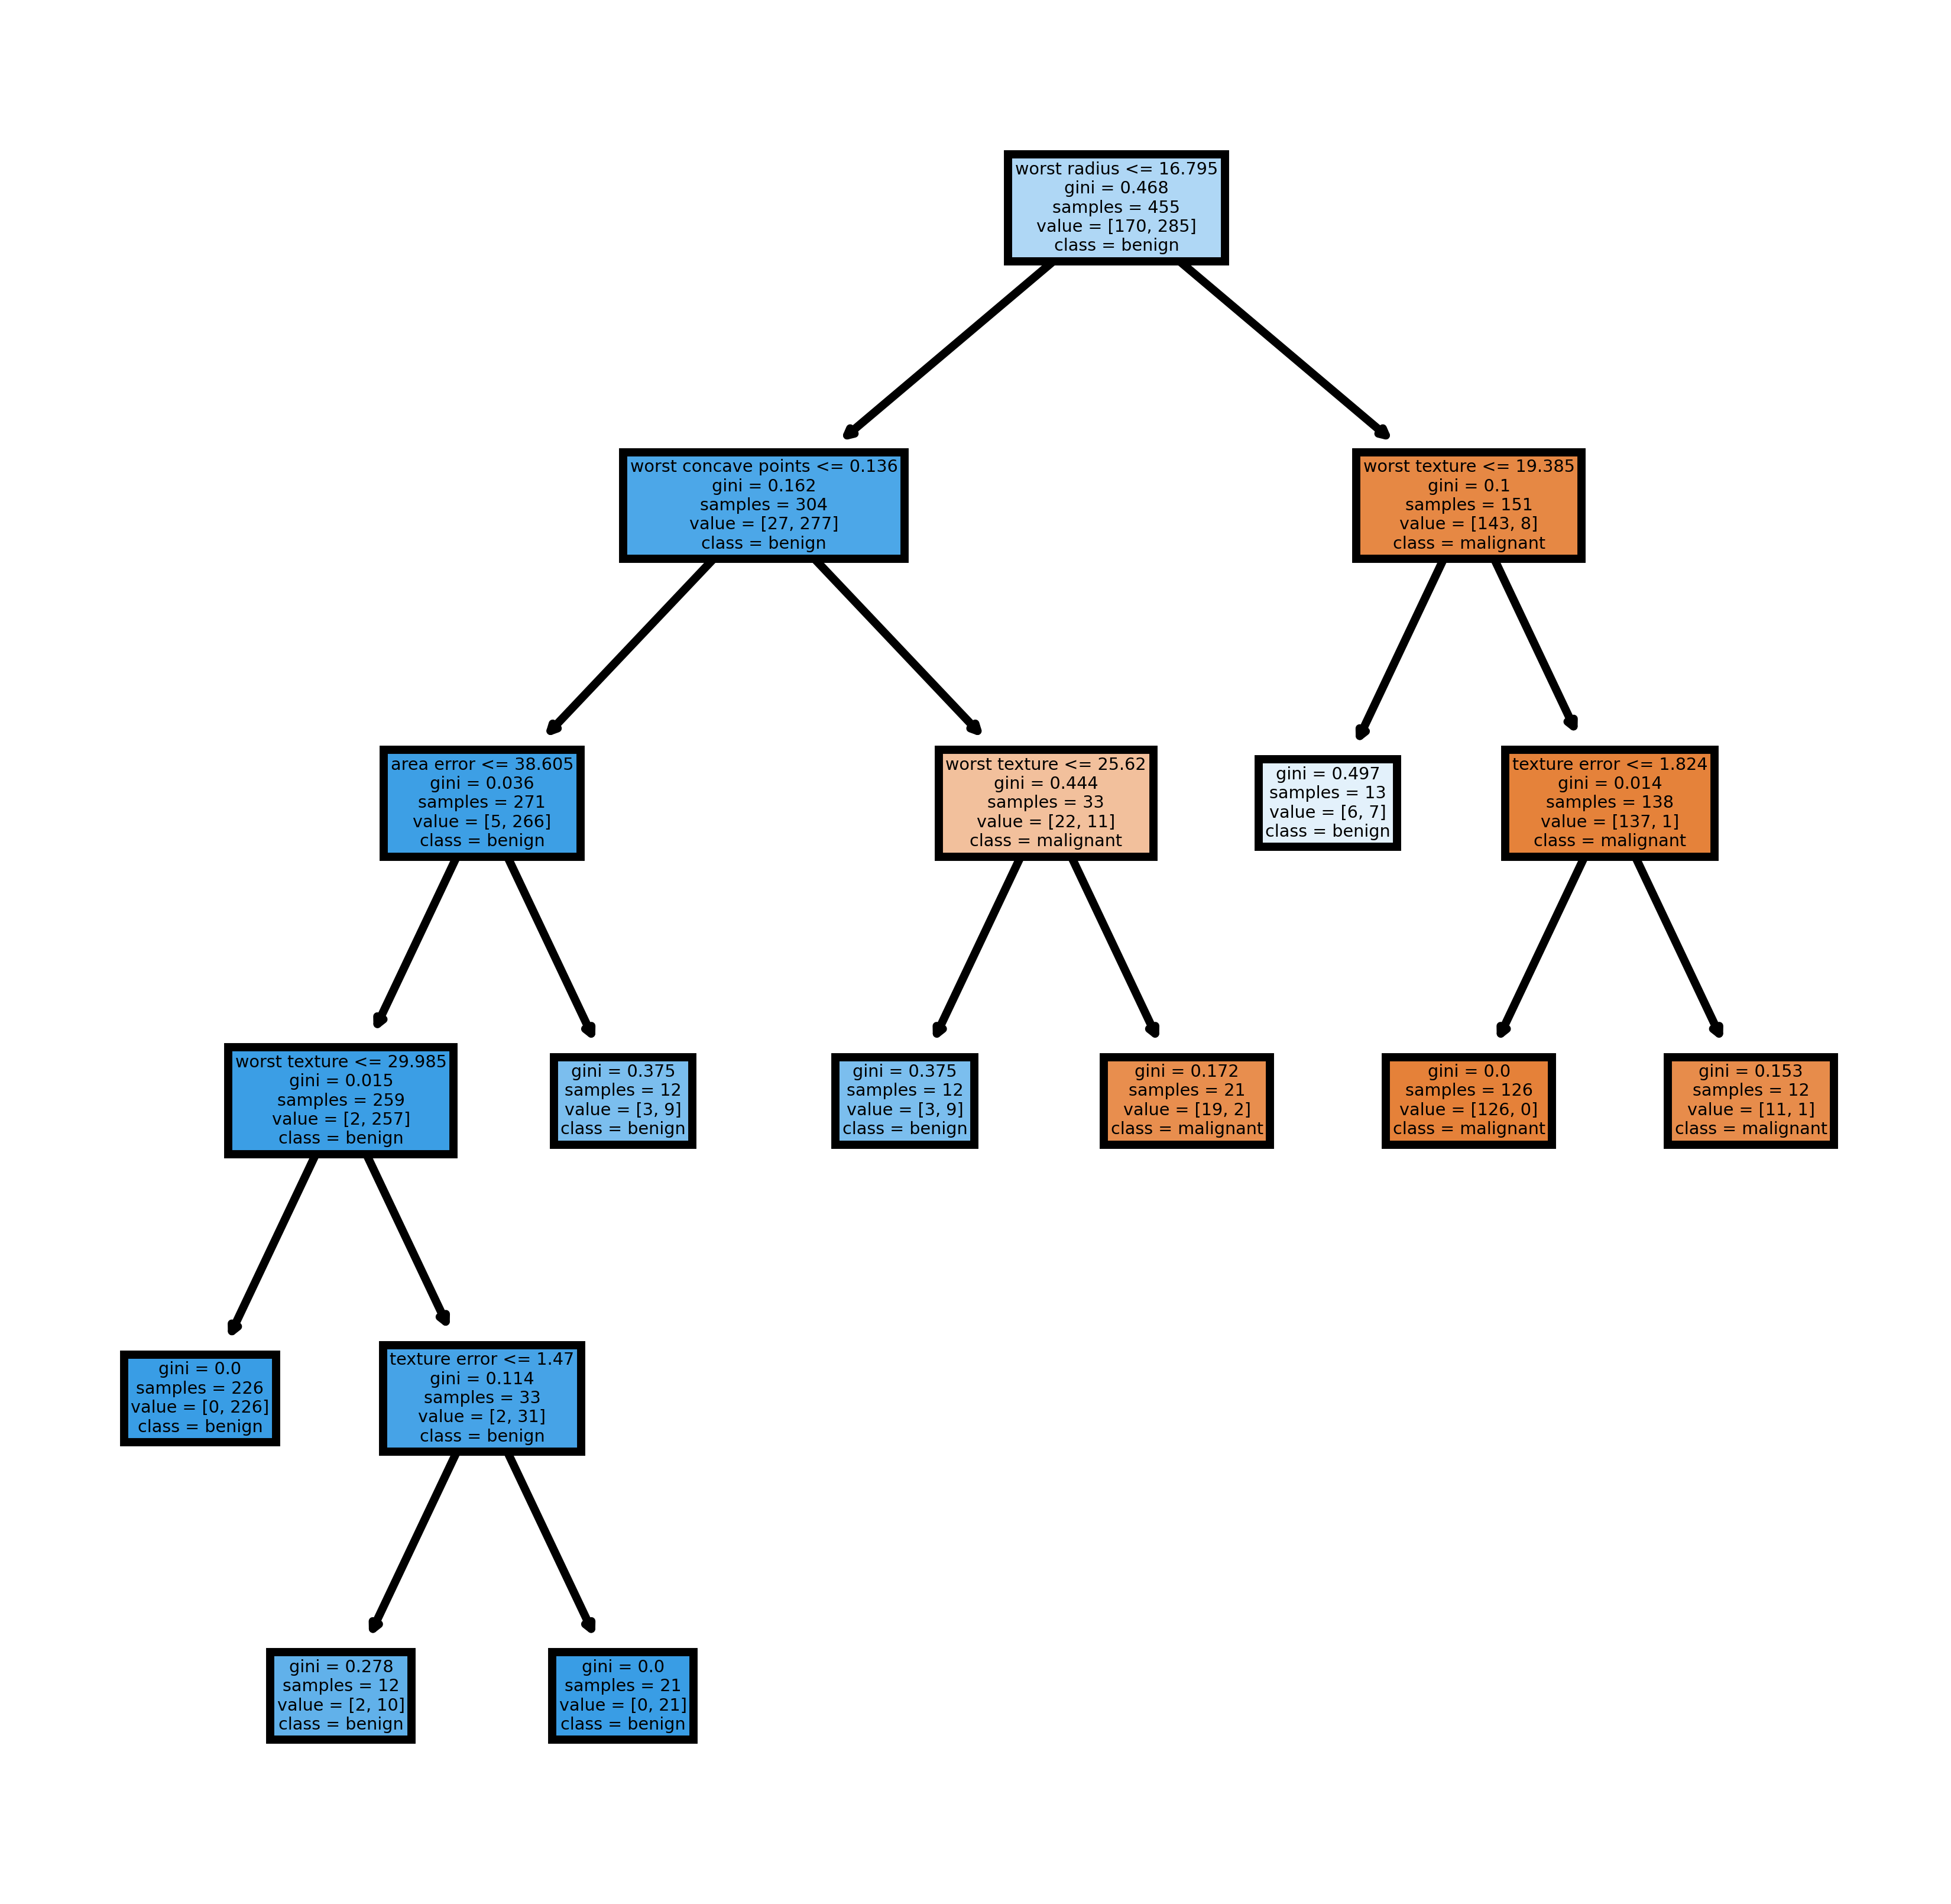

In [18]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    best_min_samples_leaf_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
)
plt.show()

In [19]:
print(classification_report(y_test, best_min_samples_leaf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Best Minimum Samples at Split Tree

In [20]:
min_samples_split_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid(
        {
            "min_samples_split": [
                [min_samples_split] for min_samples_split in np.arange(EPS, 1, 0.025)
            ]
        }
    ),
)

In [21]:
min_samples_split_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f09064de390>,
             scoring=make_scorer(accuracy_score))

In [22]:
min_samples_split_grid_search.best_params_

{'min_samples_split': 0.07500100000000001}

In [23]:
best_min_samples_split_tree = min_samples_split_grid_search.best_estimator_

In [24]:
print(best_min_samples_split_tree.get_depth())
print(best_min_samples_split_tree.get_n_leaves())

6
9


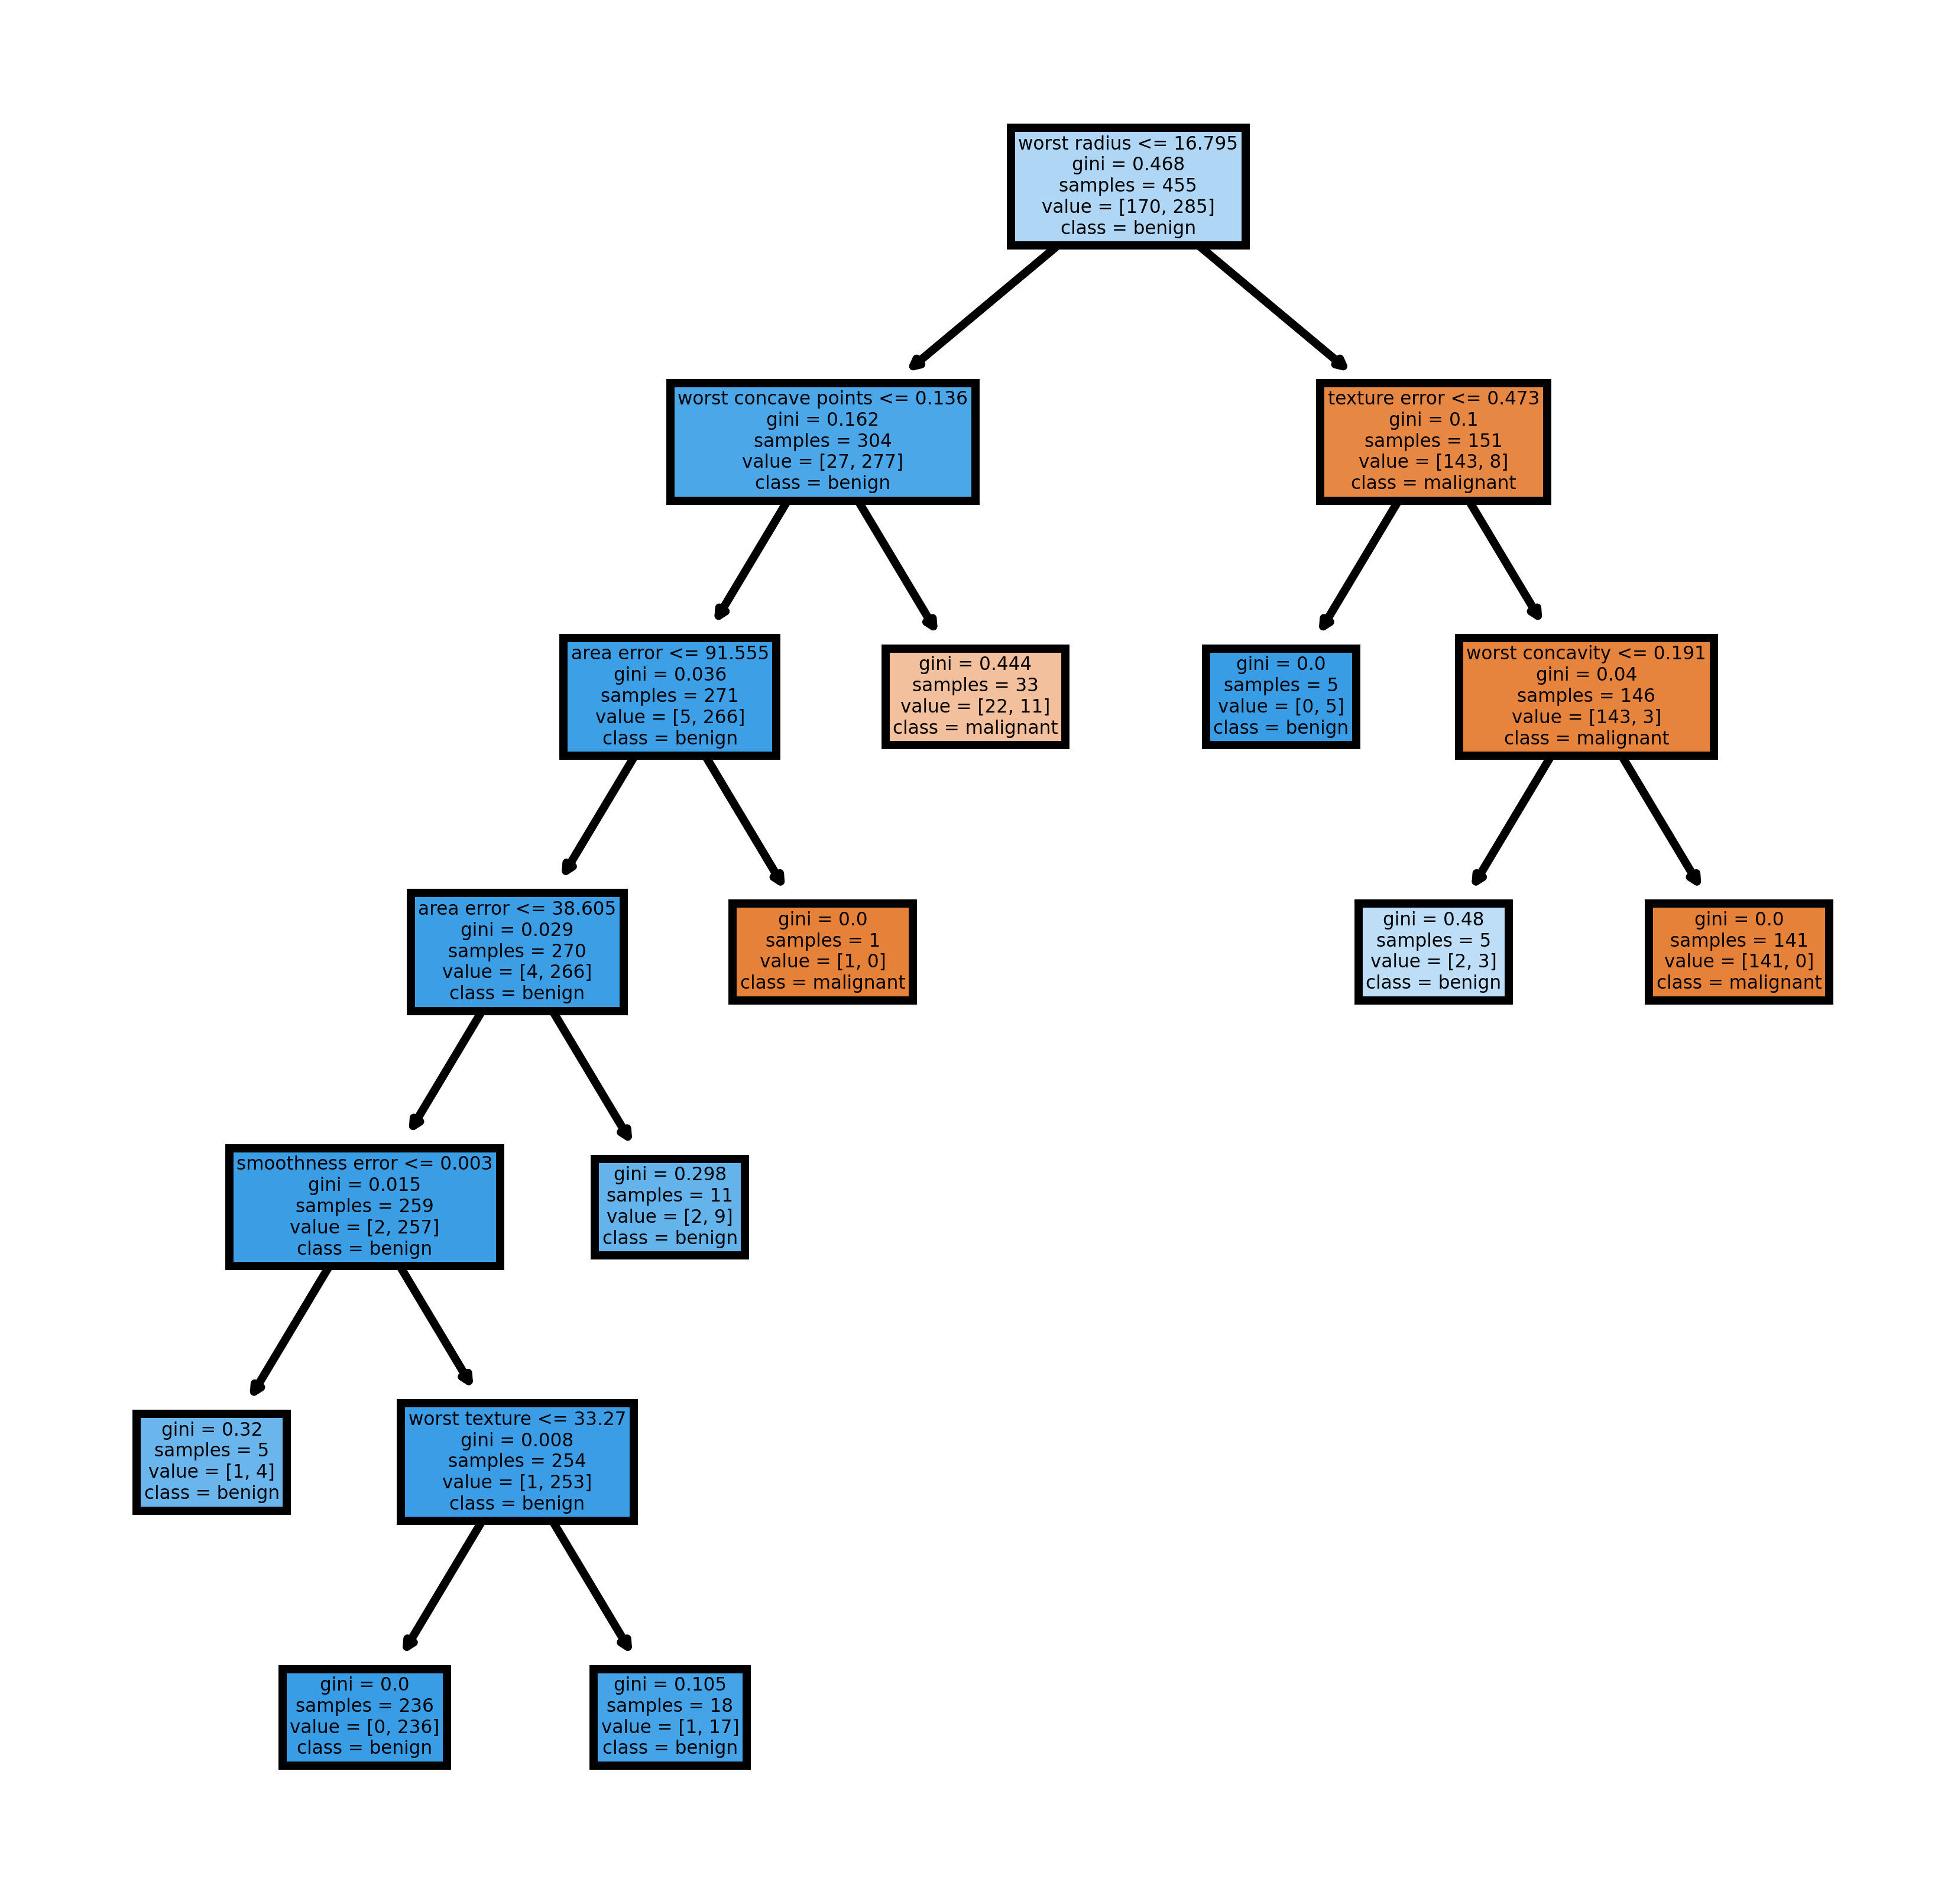

In [25]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    best_min_samples_split_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
)
plt.show()

In [26]:
print(classification_report(y_test, best_min_samples_split_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        42
           1       0.95      0.88      0.91        72

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

